In [ ]:
import numpy as np
import pandas as pd
from  sklearn.preprocessing import RobustScaler
from  sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore') 


#Question 1

In [ ]:
df=pd.read_csv('Realestate.csv')

In [ ]:
df.head() 

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.drop(columns='No', axis=1)   # redundant numbering index is removed - EDA perprocessing
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Below are the regression plots for individual variables, which give us an insight into the real estate pricing scenario in the provided dataset.

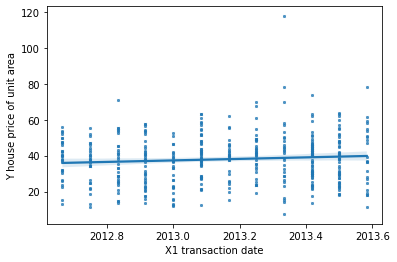

In [ ]:
sns.regplot(x='X1 transaction date', y='Y house price of unit area', data=df, marker='x',  scatter_kws={'s':5});

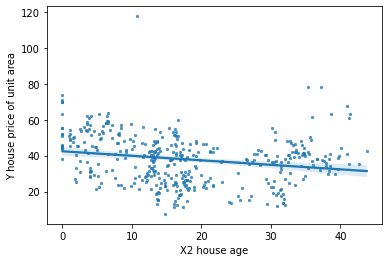

In [ ]:
sns.regplot(x='X2 house age', y='Y house price of unit area', data=df, marker='x',  scatter_kws={'s':5});

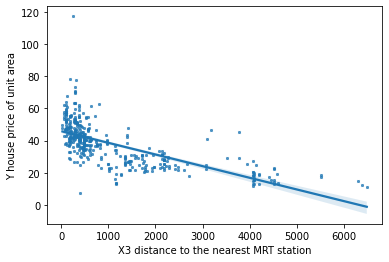

In [ ]:
sns.regplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', data=df, marker='x',  scatter_kws={'s':5});

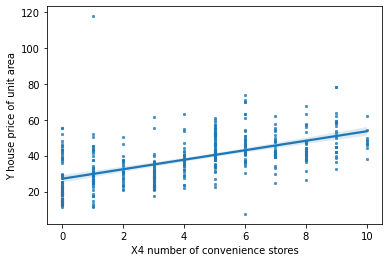

In [ ]:
sns.regplot(x='X4 number of convenience stores', y='Y house price of unit area', data=df, marker='x',  scatter_kws={'s':5});

In [ ]:
y=df[['Y house price of unit area']]
x=df.drop(['Y house price of unit area'], axis=1)

x_train,x_test,y_train,y_test = train_test_split(StandardScaler().fit_transform(x),y,test_size=0.2, random_state=0)
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

#StandardScaler transform has been used throughout the file, which ensures that highly sensitive models like regression models do not affected 

print(f"Coefficients of the model are(in order of coefficients of the LR): {lrmodel.coef_[0]}")
print()
print(f"Intercept of the model is : {lrmodel.intercept_[0]}")

print()

y_pred=lrmodel.predict(x_test)



Coefficients of the model are(in order of coefficients of the LR): [-0.53321157  1.37251199 -2.99015025 -5.69456033  3.18049366  2.80227705
 -0.15091674]

Intercept of the model is : 38.050058219569685



In [ ]:
mse=mean_squared_error(y_pred, y_test)
print(f"The mean squared error of the predicted and actual values is:{mse}")

#mse calculator

from sklearn.metrics import r2_score
r2s=r2_score(y_pred, y_test)
print(f"The Coefficient of Determination (r^2) is: {r2s}")
#coefficient of determination calculator

The mean squared error of the predicted and actual values is: 59.79820550974162
The Coefficient of Determination (r^2) is: 0.43679432419240427


In [ ]:
comparelinreg=pd.DataFrame(columns=['Test_split_value','R2Score', 'MSE'])
comparelinreg=comparelinreg.append({'Test_split_value':0.2, 'R2Score':r2s, 'MSE':mse}, ignore_index=True)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(StandardScaler().fit_transform(x),y,test_size=0.4, random_state=0)
lrmodel=LinearRegression(fit_intercept=True)
lrmodel.fit(x_train, y_train)
#training the linear regression model
print(f"Coefficients of the model are(in order of coefficients of the LR): {lrmodel.coef_[0]}")
print()
print(f"Intercept of the model is : {lrmodel.intercept_[0]}")
print()
#printing the intercept and coefficients
y_pred=lrmodel.predict(x_test)

mse=mean_squared_error(y_pred, y_test)
print(f"The mean squared error of the predicted and actual values is: {mse}")

r2s=r2_score(y_pred, y_test)
print(f"The Coefficient of Determination (r^2) is: {r2s}")


comparelinreg=comparelinreg.append({'Test_split_value':0.4, 'R2Score':r2s, 'MSE':mse}, ignore_index=True)

Coefficients of the model are(in order of coefficients of the LR): [-0.72606858  1.45118835 -3.07414134 -6.5026141   2.80691764  2.98613643
 -0.21570815]

Intercept of the model is : 38.384615074121385

The mean squared error of the predicted and actual values is: 68.35956723976624
The Coefficient of Determination (r^2) is: 0.4700579024907604


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(StandardScaler().fit_transform(x),y,test_size=0.3, random_state=0)
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

print(f"Coefficients of the model are(in order of coefficients of the LR): {lrmodel.coef_[0]}")
print()
print(f"Intercept of the model is : {lrmodel.intercept_[0]}")
print()
y_pred=lrmodel.predict(x_test)

mse=mean_squared_error(y_pred, y_test)
print(f"The mean squared error of the predicted and actual values is: {mse}")

r2s=r2_score(y_pred, y_test)
print(f"The Coefficient of Determination (r^2) is: {r2s}")

comparelinreg=comparelinreg.append({'Test_split_value':0.3, 'R2Score':r2s, 'MSE':mse}, ignore_index=True)

Coefficients of the model are(in order of coefficients of the LR): [-0.82705581  1.42801418 -3.11645192 -5.85144461  2.95105786  2.83063408
 -0.14603228]

Intercept of the model is : 38.39758934159563

The mean squared error of the predicted and actual values is: 73.10682904135139
The Coefficient of Determination (r^2) is: 0.25447458760939445


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(StandardScaler().fit_transform(x),y,test_size=0.1, random_state=0)
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

print(f"Coefficients of the model are(in order of coefficients of the LR): {lrmodel.coef_[0]}")
print()
print(f"Intercept of the model is : {lrmodel.intercept_[0]}")
print()
y_pred=lrmodel.predict(x_test)

mse=mean_squared_error(y_pred, y_test)
print(f"The mean squared error of the predicted and actual values is: {mse}")

r2s=r2_score(y_pred, y_test)
print(f"The Coefficient of Determination value(r^2) is: {r2s}")

comparelinreg=comparelinreg.append({'Test_split_value':0.1, 'R2Score':r2s, 'MSE':mse}, ignore_index=True)

Coefficients of the model are(in order of coefficients of the LR): [-0.28325579  1.43506389 -3.09069383 -5.44098457  3.64477809  2.75007411
 -0.01612844]

Intercept of the model is : 38.00658540489933

The mean squared error of the predicted and actual values is: 51.84220964670261
The Coefficient of Determination value(r^2) is: 0.5061811037579457


In [ ]:
comparelinreg=comparelinreg.sort_values(by='Test_split_value', ascending=True, ignore_index=True)
comparelinreg
#dataframe for all parameters of linear regression

,Test_split_value,R2Score,MSE
0,0.1,0.506181,51.842210
1,0.2,0.436794,59.798206
2,0.3,0.254475,73.106829
3,0.4,0.470058,68.359567


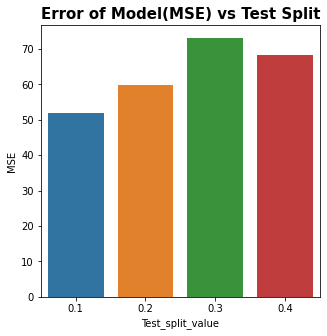

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.barplot(x='Test_split_value', y='MSE', data=comparelinreg)
plt.title("Error of Model(MSE) vs Test Split", fontsize=15, weight='bold')
#plot of error of the model vs test slit value
plt.show()


In [ ]:
test_split_ratios=[0.1, 0.2, 0.3, 0.4]
regularisation_pars=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
#Test split ratios and regularisation parameters for feeding the nested loops

In [ ]:
resultsregmodels=pd.DataFrame(columns=['Regularisation Model', 'Test Split', 'Regularisation', 'R2 value for test', 'MSE for test data'])

In [ ]:
for i in range(4):
  for j in range(6):
    x_train,x_test,y_train,y_test = train_test_split(StandardScaler().fit_transform(x),y,test_size=test_split_ratios[i], random_state=0)
    lridgemodel=Ridge(alpha=regularisation_pars[j]) # training the model
    lridgemodel.fit(x_train, y_train)
    print(f"For the Ridge Regression model with test split ratio {test_split_ratios[i]} and regularisation parameter: {regularisation_pars[j]}")
    print()
    print()
    print(f"Coefficients of the model are(in order of coefficients of the LR): {lridgemodel.coef_[0]}")
    print()
    print(f"Intercept of the model is : {lridgemodel.intercept_[0]}")
    print()
    y_pred=lridgemodel.predict(x_test)   # predicting the values

    mse=mean_squared_error(y_pred, y_test)
    print(f"The mean squared error of the predicted and actual values is: {mse}")

    r2s=r2_score(y_pred, y_test)
    print(f"The Coefficient of Determination value(r^2) is: {r2s}")
    #printing the error values and r2 values

    resultsregmodels=resultsregmodels.append({'Regularisation Model':'Ridge', 'Test Split':test_split_ratios[i],
          'Regularisation':regularisation_pars[j], 'R2 value for test': r2s, 'MSE for test data': mse}, ignore_index=True)

    #extending the above algorithm to lasso 


    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_split_ratios[i])
    lassomodel=Lasso(alpha=regularisation_pars[j])
    lassomodel.fit(x_train, y_train)
    print(f"For the Lasso Regression model with test split ratio {test_split_ratios[i]} and regularisation parameter: {regularisation_pars[j]}")
    print()
    print()
    print(f"Coefficients of the model are: {lassomodel.coef_[0]}")
    print()
    print(f"Intercept of the model is : {lassomodel.intercept_[0]}")
    print()
    y_pred=lassomodel.predict(x_test)

    mse=mean_squared_error(y_pred, y_test)
    print(f"The mean squared error of the predicted and actual values is: {mse}")

    r2s=r2_score(y_pred, y_test)
    print(f"The Coefficient of Determination value(r^2) is: {r2s}")

    print('\n'*3)
    print('*='*65)

    resultsregmodels=resultsregmodels.append({'Regularisation Model':'Lasso', 'Test Split':test_split_ratios[i],
          'Regularisation':regularisation_pars[j], 'R2 value for test': r2s, 'MSE for test data': mse}, ignore_index=True)

For the Ridge Regression model with test split ratio 0.1 and regularisation parameter: 0.001


Coefficients of the model are(in order of coefficients of the LR): [-0.28325346  1.4350585  -3.09068494 -5.44093461  3.64477886  2.75007957
 -0.01609027]

Intercept of the model is : 38.00658552489317

The mean squared error of the predicted and actual values is: 51.842235744687265
The Coefficient of Determination value(r^2) is: 0.5061789151693752
For the Lasso Regression model with test split ratio 0.1 and regularisation parameter: 0.001


Coefficients of the model are: -0.005193707330307088

Intercept of the model is : -16284.193248241314

The mean squared error of the predicted and actual values is: 65.14240373924834
The Coefficient of Determination value(r^2) is: 0.20181517507223135




*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
For the Ridge Regression model with test split ratio 0.1 and regularisatio

In [ ]:
resultsregmodels.sort_values(by='Regularisation Model', ignore_index=True,)

,Regularisation Model,Test Split,Regularisation,R2 value for test,MSE for test data
0,Lasso,0.2,0.500,0.540419,56.029473
1,Lasso,0.4,0.100,0.243640,82.665163
2,Lasso,0.4,0.050,0.346431,70.755300
3,Lasso,0.4,0.010,0.323550,67.564802
4,Lasso,0.4,0.005,0.312112,57.577544
5,Lasso,0.4,0.001,0.480142,66.782670
6,Lasso,0.3,0.500,-0.170626,116.788497
7,Lasso,0.3,0.100,0.163865,75.685929
8,Lasso,0.3,0.050,0.272467,73.452881
9,Lasso,0.3,0.010,0.407425,65.441280


#Question 2

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df2=pd.read_csv("haberman.data")

In [ ]:
df2.head()
#first entry is seen as a header, so we have to change that

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
df2.columns=['age', 'yr', 'pos_nodes', 'status']
df2.head()
#statuses are 1 if average lifespan after surgery is more than 5 years
#else, status is 2 

,age,yr,pos_nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
print(f"Total number of records is: {df2.shape[0]}")
x=df2.shape[1]

Total number of records is: 305


In [ ]:
no_surv=len(df2[df2['status']==1])
no_notsurv=len(df2[df2['status']==2])

<Figure size 360x720 with 0 Axes>

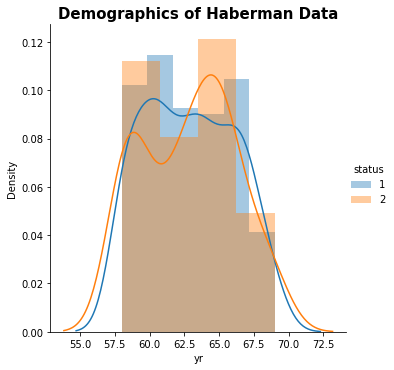

In [ ]:
fig=plt.figure(figsize=(5, 10))
fig=sns.FacetGrid(df2, hue="status",size=5).map(sns.distplot,"yr").add_legend()
plt.title("Demographics of Haberman Data", fontsize=15, weight='bold')
plt.show()
#plotting the density graphs alongwith the frequency bars


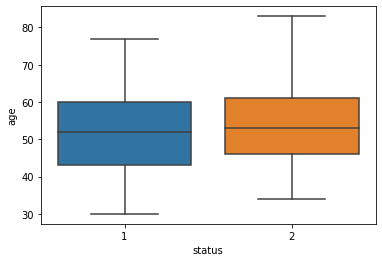

In [ ]:
sns.boxplot(x='status',y='age', data=df2, )
#displaying the demographics of data - preprocessing

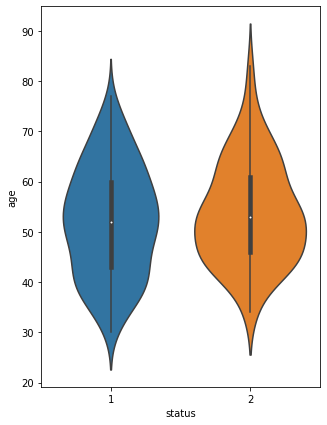

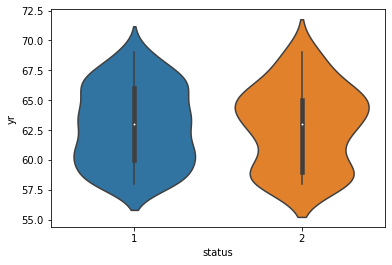

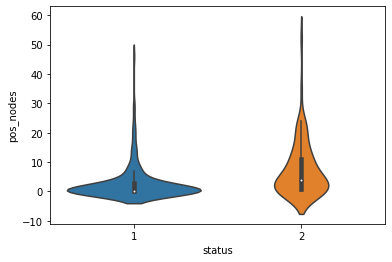

In [ ]:
fig=plt.figure(figsize=(5, 7))
columns2=['age', 'yr', 'pos_nodes']
for i in columns2:
    sns.violinplot(x='status', y=i, data=df2, split=True)
    plt.show()

#the violin plots show the distribution of patients across variuos parameters

In [ ]:
x=df2.drop(['status'], axis=1)
y=df2[['status']]
x_train,x_test,y_train,y_test = train_test_split(StandardScaler().fit_transform(x),y,test_size=0.2, )
lrmodel=LogisticRegression()
lrmodel.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f"Coefficients of the model are( in order of coefficients of the LR ):{lrmodel.coef_[0]}")
print(f"Intercept of the model is : {lrmodel.intercept_[0]}")

Coefficients of the model are( in order of coefficients of the LR ):[0.23799613 0.07945417 0.57359076]
Intercept of the model is : -1.0650458919989563


In [ ]:
y_pred=lrmodel.predict(x_test)
count=0
for i in range(len(y_pred)):
  if y_pred[i]!=y_test.iloc[i,0]:
    count=count+1
# checking the equality is essentially the error classification problem given 
classification_error=count/(len(y_test))
print(f"Test Accuracy is : {1-classification_error}")
print(f"Classification Error is : {classification_error}")

Test Accuracy is : 0.7704918032786885
Classification Error is : 0.22950819672131148


In [ ]:
print("The actual values of the test list are :", end=' ')
y_testlist=[]
for i in range(len(y_test)):
  y_testlist.append(y_test.iloc[i, 0])
print(y_testlist)

print("The predicted values from the model are:", end=' ')
y_predlist=[]
for i in range(len(y_test)):
  y_predlist.append(y_pred[i])
print(y_predlist)

print()

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print("This is the confusion matrix for the above test.")
#printing the confusion matrix for actual and predicted values

The actual values of the test list are : [1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1]
The predicted values from the model are: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1]

[[43  2]
 [12  4]]
This is the confusion matrix for the above test.


In [ ]:
compare = pd.DataFrame(columns=['Test_Split', 'Accuracy', 'Classification_error']) # creating a dataframe for storing the results of each model
compare=compare.append({'Test_Split':0.2, 'Accuracy': 1 - classification_error, 
                        'Classification_error':classification_error}, ignore_index=True )

In [ ]:
x=df2.drop(['status'], axis=1)
y=df2[['status']]
x_train,x_test,y_train,y_test = train_test_split(StandardScaler().fit_transform(x),y,test_size=0.4, )
lrmodel=LogisticRegression()
lrmodel.fit(x_train, y_train)

print(f"Coefficients of the model are(in order of coefficients of the LR): {lrmodel.coef_[0]}")
print(f"Intercept of the model is : {lrmodel.intercept_[0]}")

print()

y_pred=lrmodel.predict(x_test)
count=0
for i in range(len(y_pred)):
  if y_pred[i]!=y_test.iloc[i,0]:
    count=count+1
# checking the equality is essentially the error classification problem given 
classification_error=count/(len(y_test))
print(f"Test Accuracy is : {1-classification_error}")
print(f"Classification Error is : {classification_error}")

print()

print("The actual values of the test list are :", end=' ')
y_testlist=[]
for i in range(len(y_test)):
  y_testlist.append(y_test.iloc[i, 0])
print(y_testlist)

print("The predicted values from the model are:", end=' ')
y_predlist=[]
for i in range(len(y_test)):
  y_predlist.append(y_pred[i])
print(y_predlist)

print()

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print("This is the confusion matrix for the above test.")


compare=compare.append({'Test_Split':0.4, 'Accuracy': 1 - classification_error, 
                        'Classification_error':classification_error}, ignore_index=True )

Coefficients of the model are(in order of coefficients of the LR): [ 0.21683209 -0.00354039  0.42867313]
Intercept of the model is : -1.0669157419500424

Test Accuracy is : 0.7459016393442623
Classification Error is : 0.2540983606557377

The actual values of the test list are : [2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1]
The predicted values from the model are: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
x=df2.drop(['status'], axis=1)
y=df2[['status']]
x_train,x_test,y_train,y_test = train_test_split(StandardScaler().fit_transform(x),y,test_size=0.3)
lrmodel=LogisticRegression()
lrmodel.fit(x_train, y_train)

print(f"Coefficients of the model are(in order of coefficients of the LR): {lrmodel.coef_[0]}")
print(f"Intercept of the model is : {lrmodel.intercept_[0]}")

print()

y_pred=lrmodel.predict(x_test)
count=0
for i in range(len(y_pred)):
  if y_pred[i]!=y_test.iloc[i,0]:
    count=count+1
# checking the equality is essentially the error classification problem given 
classification_error=count/(len(y_test))
print(f"Test Accuracy is : {1-classification_error}")
print(f"Classification Error is : {classification_error}")

print()

print("The actual values of the test list are :", end=' ')
y_testlist=[]
for i in range(len(y_test)):
  y_testlist.append(y_test.iloc[i, 0])
print(y_testlist)

print("The predicted values from the model are:", end=' ')
y_predlist=[]
for i in range(len(y_test)):
  y_predlist.append(y_pred[i])
print(y_predlist)

print()

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print("This is the confusion matrix for the above test.")


compare=compare.append({'Test_Split':0.3, 'Accuracy': 1 - classification_error, 
                        'Classification_error':classification_error}, ignore_index=True )

Coefficients of the model are(in order of coefficients of the LR): [ 0.28552599 -0.04786809  0.44629869]
Intercept of the model is : -1.0683805329093317

Test Accuracy is : 0.75
Classification Error is : 0.25

The actual values of the test list are : [1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1]
The predicted values from the model are: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]

[[67  1]
 [22  2]]
This is the confusion matrix for the above test.


In [ ]:
x=df2.drop(['status'], axis=1)
y=df2[['status']]
x_train,x_test,y_train,y_test = train_test_split(StandardScaler().fit_transform(x),y,test_size=0.1)
lrmodel=LogisticRegression()
lrmodel.fit(x_train, y_train)

print(f"Coefficients of the model are(in order of coefficients of the LR): {lrmodel.coef_[0]}")
print(f"Intercept of the model is : {lrmodel.intercept_[0]}")

print()

y_pred=lrmodel.predict(x_test)
count=0
for i in range(len(y_pred)):
  if y_pred[i]!=y_test.iloc[i,0]:
    count=count+1
# checking the equality is essentially the error classification problem given 
classification_error=count/(len(y_test))
print(f"Test Accuracy is : {1-classification_error}")
print(f"Classification Error is : {classification_error}")

print()

print("The actual values of the test list are :", end=' ')
y_testlist=[]
for i in range(len(y_test)):
  y_testlist.append(y_test.iloc[i, 0])
print(y_testlist)

print("The predicted values from the model are:", end=' ')
y_predlist=[]
for i in range(len(y_test)):
  y_predlist.append(y_pred[i])
print(y_predlist)

print()

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print("This is the confusion matrix for the above test.")


compare=compare.append({'Test_Split':0.1, 'Accuracy': 1 - classification_error, 
                        'Classification_error':classification_error}, ignore_index=True )

Coefficients of the model are(in order of coefficients of the LR): [ 0.26085475 -0.07118273  0.59862103]
Intercept of the model is : -1.099745053596528

Test Accuracy is : 0.6774193548387097
Classification Error is : 0.3225806451612903

The actual values of the test list are : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2]
The predicted values from the model are: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1]

[[19  2]
 [ 8  2]]
This is the confusion matrix for the above test.


In [ ]:
compare

,Test_Split,Accuracy,Classification_error
0,0.2,0.770492,0.229508
1,0.4,0.745902,0.254098
2,0.3,0.750000,0.250000
3,0.1,0.677419,0.322581


In [ ]:
compare.sort_values(by='Test_Split', ascending=True, ignore_index=True)

,Test_Split,Accuracy,Classification_error
0,0.1,0.677419,0.322581
1,0.2,0.770492,0.229508
2,0.3,0.750000,0.250000
3,0.4,0.745902,0.254098


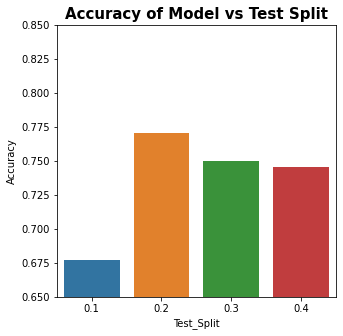

In [ ]:
fig=plt.figure(figsize=(5, 5))
sns.barplot(x='Test_Split', y='Accuracy', data=compare)
plt.title("Accuracy of Model vs Test Split", fontsize=15, weight='bold')
plt.ylim(.65, .85)
plt.show()
#plotting the accuracy of model vs test split

We get highly distorted values of accuracies due to randomness and small set of data.